In [1]:
import os

CSV_FOLDER = "results"

files = os.listdir(CSV_FOLDER)
files = [f for f in files if f.endswith(".csv") and f.startswith("Measurements")]
print(files[:5])

['Measurements_im10125_jpg_10.csv', 'Measurements_im10125_jpg_10000.csv', 'Measurements_im10125_jpg_2000.csv', 'Measurements_im10125_jpg_4000.csv', 'Measurements_im10125_jpg_500.csv']


In [2]:
import pandas as pd

# combine all files with same index column into one table
dfs = []
for f in files:
	df = pd.read_csv(os.path.join(CSV_FOLDER, f))
	df = df.set_index("Measurements")
	dfs.append(df)

# merge all dataframes same index column
df = pd.concat(dfs, axis=1)

In [3]:
df

,Values,Values,Values,Values,Values,Values,Values,Values,Values,Values,...,Values,Values,Values,Values,Values,Values,Values,Values,Values,Values
Measurements,,,,,,,,,,,,,,,,,,,,,
file_name,im10125.jpg,im10125.jpg,im10125.jpg,im10125.jpg,im10125.jpg,im10125.jpg,im10125.jpg,im10450.jpg,im10450.jpg,im10450.jpg,...,im619.jpg,im619.jpg,im619.jpg,im87.jpg,im87.jpg,im87.jpg,im87.jpg,im87.jpg,im87.jpg,im87.jpg
k,10,10000,2000,4000,500,6000,8000,10,10000,2000,...,500,6000,8000,10,10000,2000,4000,500,6000,8000
Input labels,female; male; people; plant_life; sky; sunset;...,female; male; people; plant_life; sky; sunset;...,female; male; people; plant_life; sky; sunset;...,female; male; people; plant_life; sky; sunset;...,female; male; people; plant_life; sky; sunset;...,female; male; people; plant_life; sky; sunset;...,female; male; people; plant_life; sky; sunset;...,plant_life; structures,plant_life; structures,plant_life; structures,...,clouds; people; plant_life; sky; structures; tree,clouds; people; plant_life; sky; structures; tree,clouds; people; plant_life; sky; structures; tree,flower; plant_life,flower; plant_life,flower; plant_life,flower; plant_life,flower; plant_life,flower; plant_life,flower; plant_life
Processing time (secs),2.281,2.66,2.092,2.223,2.047,2.131,2.048,2.327,2.201,2.167,...,3.003,3.019,3.03,3.236,3.184,3.006,3.284,3.264,3.183,2.963
Searching time (secs),0.006,0.412,0.092,0.179,0.039,0.266,0.342,0.009,0.4,0.1,...,0.058,0.475,0.576,0.007,0.962,0.133,0.303,0.051,0.468,0.608
Correct images,9,2036,809,1302,278,1610,1845,9,5900,1173,...,386,3251,3807,10,4461,1411,2281,476,3078,3782
Correct images in DB,3155,3155,3155,3155,3155,3155,3155,14810,14810,14810,...,7152,7152,7152,8763,8763,8763,8763,8763,8763,8763
Precision@K,0.9,0.204,0.405,0.326,0.556,0.268,0.231,0.9,0.59,0.587,...,0.772,0.542,0.476,1.0,0.446,0.706,0.57,0.952,0.513,0.473
Recall@K,0.003,0.645,0.256,0.413,0.088,0.51,0.585,0.001,0.398,0.079,...,0.054,0.455,0.532,0.001,0.509,0.161,0.26,0.054,0.351,0.432


In [4]:
trans_df = df.T
# new index from 1 to n
trans_df["index"] = range(1, trans_df.shape[0] + 1)
trans_df["k"].astype(int)
# remove old index
trans_df.reset_index(inplace=True)
trans_df.set_index("index", inplace=True)
# sort by file_name and then by k
trans_df.sort_values(by=["file_name", "k"], inplace=True)


In [5]:
for column in trans_df.columns:
    if column == "file_name" or "level_0" or "Input labels":
        continue
    if "Correct" in column:
        trans_df[column].astype(int)
    else:
        trans_df[column].astype(float)

# rename index column
trans_df.drop(columns="level_0", inplace=True)

In [6]:
trans_df.describe()

Measurements,file_name,k,Input labels,Processing time (secs),Searching time (secs),Correct images,Correct images in DB,Precision@K,Recall@K,Reciprocal Rank (RR),Average Precision@K (AP@K)
count,140,140,140,140,140,140,140,140,140,140,140
unique,20,7,20,127,126,126,20,123,116,1,122
top,im10125.jpg,10,female; male; people; plant_life; sky; sunset;...,3.172,0.009,10,3155,1.0,0.001,1.0,1.0
freq,7,20,7,4,4,8,7,8,12,140,12


In [7]:
file_names = trans_df["file_name"].unique()
print(file_names)

['im10125.jpg' 'im10450.jpg' 'im115.jpg' 'im12.jpg' 'im12739.jpg'
 'im1470.jpg' 'im15005.jpg' 'im196.jpg' 'im19723.jpg' 'im20341.jpg'
 'im24774.jpg' 'im248.jpg' 'im24855.jpg' 'im24979.jpg' 'im301.jpg'
 'im38.jpg' 'im46.jpg' 'im483.jpg' 'im619.jpg' 'im87.jpg']


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
temp = trans_df[trans_df["k"] == "10"]

In [10]:
ks = [10, 500, 2000, 4000, 6000,8000, 10000]
mrr_s = []
map_s = []
searching_time_s = []
metrics = pd.DataFrame(
    columns=["k", "Mean RR", "Mean AP", "Mean Searching Time (secs)", "Mean Processing Time (secs)"],
)
metrics.set_index("k", inplace=True)
for each_k in ks:
    each_k = str(each_k)
    temp = trans_df[trans_df["k"] == each_k]
    try:        
        mean_rr = temp["Reciprocal Rank (RR)"].astype(float).mean()
        mean_ap = temp["Average Precision@K (AP@K)"].astype(float).mean()
        search_time = temp["Searching time (secs)"].astype(float).mean()
        processing_time = temp["Processing time (secs)"].astype(float).mean()
        searching_time_s.append(search_time)
        mrr_s.append(mean_rr)
        map_s.append(mean_ap)
        metrics.loc[each_k] = [mean_rr, mean_ap, search_time, processing_time]
        print(f"K={each_k}, item={temp['file_name'].count()}, Search Time: {search_time}, Mean RR: {mean_rr}, Mean AP: {mean_ap}")
    except Exception as e:
        print(f"k={each_k} bug")
        print(e)

K=10, item=20, Search Time: 0.0108, Mean RR: 1.0, Mean AP: 0.9247500000000001
K=500, item=20, Search Time: 0.06105000000000001, Mean RR: 1.0, Mean AP: 0.6852500000000001
K=2000, item=20, Search Time: 0.15675000000000003, Mean RR: 1.0, Mean AP: 0.5770500000000001
K=4000, item=20, Search Time: 0.27995, Mean RR: 1.0, Mean AP: 0.5219
K=6000, item=20, Search Time: 0.40205, Mean RR: 1.0, Mean AP: 0.48950000000000005
K=8000, item=20, Search Time: 0.48405000000000004, Mean RR: 1.0, Mean AP: 0.4668
K=10000, item=20, Search Time: 0.6603, Mean RR: 1.0, Mean AP: 0.45145


In [11]:
total_file = len(trans_df["file_name"].unique())
print(f"Total file: {total_file}")

Total file: 20


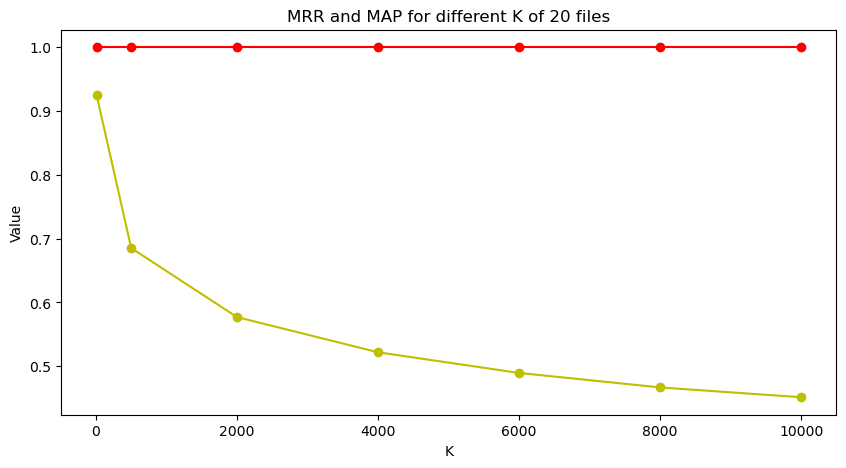

In [12]:
# plot mrr and map
plt.figure(figsize=(10, 5))
plt.plot(ks, map_s, "yo-", label="MAP")
plt.plot(ks, mrr_s, "ro-", label="MRR")

plt.xlabel("K")
plt.ylabel("Value")
plt.title(f"MRR and MAP for different K of {total_file} files")
plt.show()

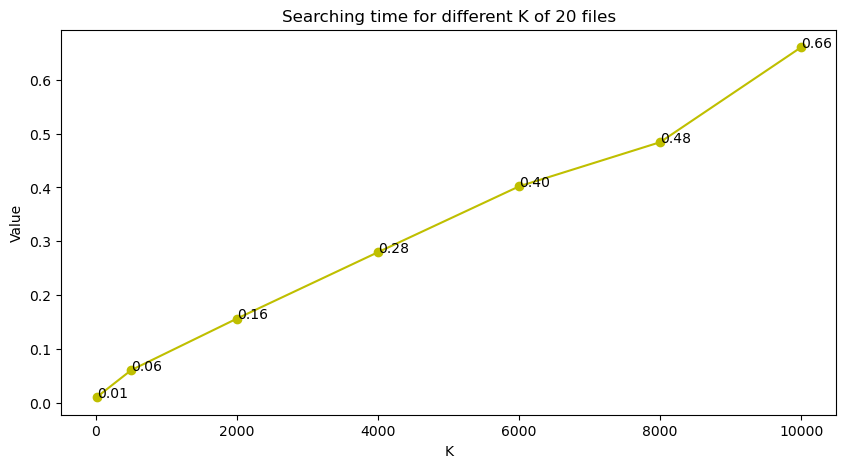

In [13]:
# plot mrr and map
plt.figure(figsize=(10, 5))
plt.plot(ks, searching_time_s, "yo-", label="searching time")
# plot values
for i, txt in enumerate(searching_time_s):
	plt.annotate(f"{txt:.2f}", (ks[i], searching_time_s[i]))
plt.xlabel("K")
plt.ylabel("Value")
plt.title(f"Searching time for different K of {total_file} files")
plt.show()

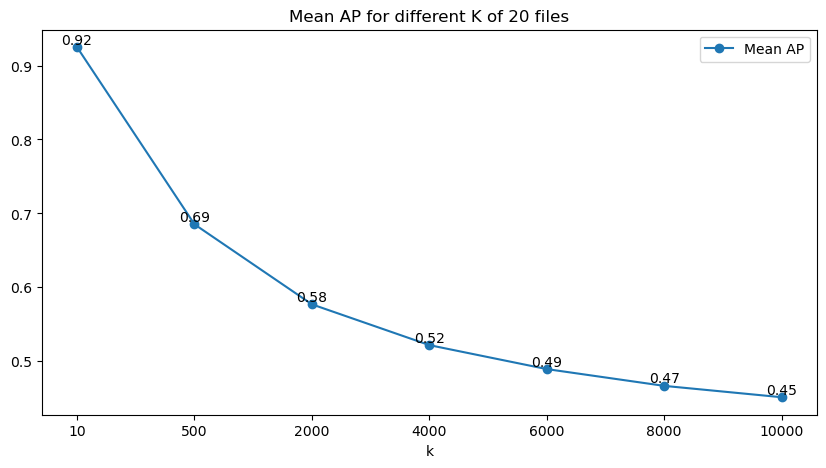

In [14]:
metrics.plot(kind="line",y=[1], figsize=(10, 5), marker="o", title=f"Mean AP for different K of {total_file} files")
for i in range(len(metrics)):
	plt.text(i, metrics.iloc[i, 1], f"{metrics.iloc[i, 1]:.2f}", ha="center", va="bottom")

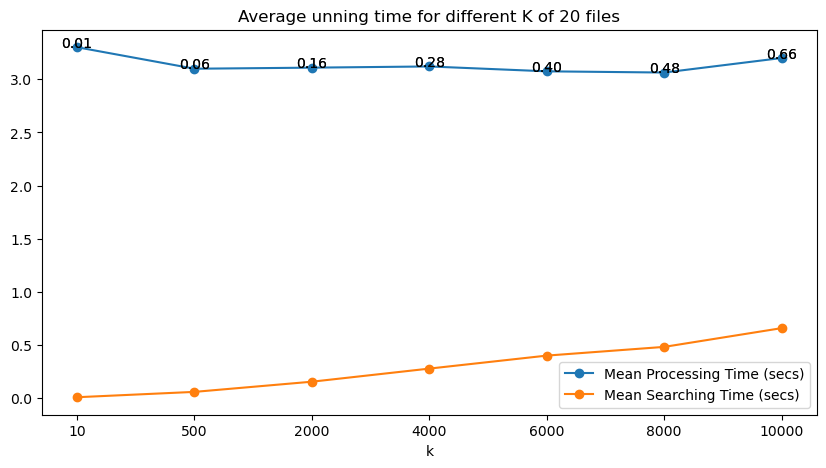

In [15]:
# metrics.plot with values on top points
metrics.plot(kind="line", marker="o", y=[3, 2], figsize=(10, 5), title=f"Average unning time for different K of {total_file} files")
for i in range(len(metrics)):
	plt.text(i, metrics.iloc[i, 3], f"{metrics.iloc[i, 2]:.2f}", ha="center")
	plt.text(i, metrics.iloc[i, 3], f"{metrics.iloc[i, 2]:.2f}", ha="center")

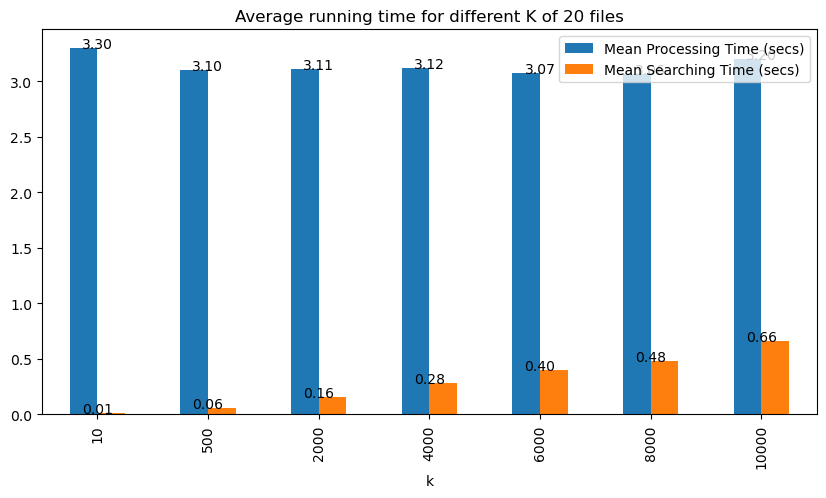

In [16]:
metrics.plot(kind="bar", y=[3, 2], figsize=(10, 5), title=f"Average running time for different K of {total_file} files")
for i in range(len(metrics)):
	plt.text(i, metrics.iloc[i, 3], f"{metrics.iloc[i, 3]:.2f}", ha="center")
	plt.text(i, metrics.iloc[i, 2], f"{metrics.iloc[i, 2]:.2f}", ha="center")